<a href="https://colab.research.google.com/github/C-Gabs/Portafolio/blob/main/Machine_learning_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset

https://www.kaggle.com/datasets/wardabilal/bmw-cars-dataset-analysis-with-visualizations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Portafolio/Datos/bmw.csv')

##Introduction

The dataset, which includes over 10,000 entries with various features pertaining to car specifications, pricing, and performance, is supplied in a single CSV file called bmw.csv. It is clear, well-structured, and appropriate for analysis, visualization, and predictive modeling.

##Columns Overview

**model:** Name of BMW automobile model

**year:** The car's manufacturing year

**price:** GBP selling price

**transmission:** Type of transmission (Manual, Semi-Auto, Automatic)

**mileage:** The sum of the miles traveled

**fuelType:** fuel type (e.g., diesel, gasoline, hybrid, etc.)

**tax:** Road tax per year in GBP

**mpg:** Fuel efficiency in miles per gallon

**motorSize:** Engine displacement in liters

#Análisis Exploratorio

In [3]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [4]:
data['model'].unique()

array([' 5 Series', ' 6 Series', ' 1 Series', ' 7 Series', ' 2 Series',
       ' 4 Series', ' X3', ' 3 Series', ' X5', ' X4', ' i3', ' X1', ' M4',
       ' X2', ' X6', ' 8 Series', ' Z4', ' X7', ' M5', ' i8', ' M2',
       ' M3', ' M6', ' Z3'], dtype=object)

In [5]:
data['model'].value_counts()

,count
model,
3 Series,2443
1 Series,1969
2 Series,1229
5 Series,1056
4 Series,995
X1,804
X3,551
X5,468
X2,288


In [6]:
data['transmission'].value_counts()

,count
transmission,
Semi-Auto,4666
Automatic,3588
Manual,2527


In [7]:
data['engineSize'].unique()

array([2. , 3. , 1.5, 0.6, 1.6, 4.4, 0. , 2.2, 2.5, 4. , 3.2, 1. , 5. ,
       1.9, 6.6, 2.8, 3.5])

In [8]:
data['engineSize'].value_counts()

,count
engineSize,
2.0,6575
3.0,2458
1.5,1463
1.6,109
4.4,79
0.0,47
2.5,14
0.6,7
2.2,6


In [9]:
data['fuelType'].value_counts()

,count
fuelType,
Diesel,7027
Petrol,3417
Hybrid,298
Other,36
Electric,3


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [11]:
data.describe().round(2)

,year,price,mileage,tax,mpg,engineSize
count,10781.00,10781.00,10781.00,10781.00,10781.00,10781.00
mean,2017.08,22733.41,25496.99,131.70,56.40,2.17
std,2.35,11415.53,25143.19,61.51,31.34,0.55
min,1996.00,1200.00,1.00,0.00,5.50,0.00
25%,2016.00,14950.00,5529.00,135.00,45.60,2.00
50%,2017.00,20462.00,18347.00,145.00,53.30,2.00
75%,2019.00,27940.00,38206.00,145.00,62.80,2.00
max,2020.00,123456.00,214000.00,580.00,470.80,6.60


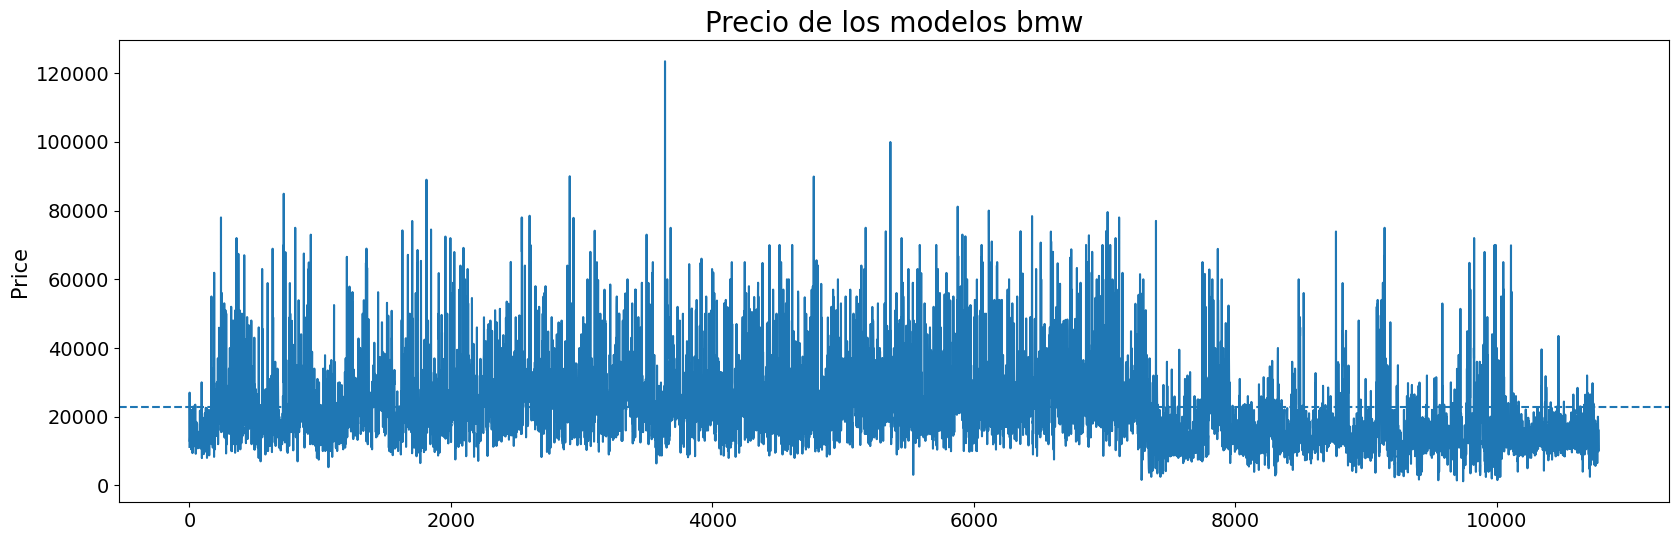

In [12]:
fig, ax = plt.subplots(figsize=(20,6))
ax = data['price'].plot(fontsize=14)
ax.axhline(y=np.mean(data['price']), ls='--')
ax.set_title('Precio de los modelos bmw', fontsize=20)
ax.set_ylabel('Price', fontsize=15)
plt.show()

In [13]:
data[['price', 'mileage', 'tax', 'mpg', 'engineSize']].corr()

,price,mileage,tax,mpg,engineSize
price,1.000000,-0.605397,0.263484,-0.204882,0.460196
mileage,-0.605397,1.000000,-0.170747,0.118609,-0.002540
tax,0.263484,-0.170747,1.000000,-0.351798,0.429616
mpg,-0.204882,0.118609,-0.351798,1.000000,-0.399844
engineSize,0.460196,-0.002540,0.429616,-0.399844,1.000000


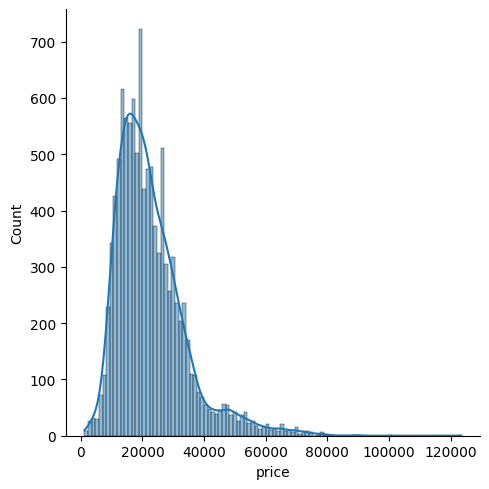

In [14]:
sns.displot(data['price'], kde=True)

<Axes: xlabel='price'>

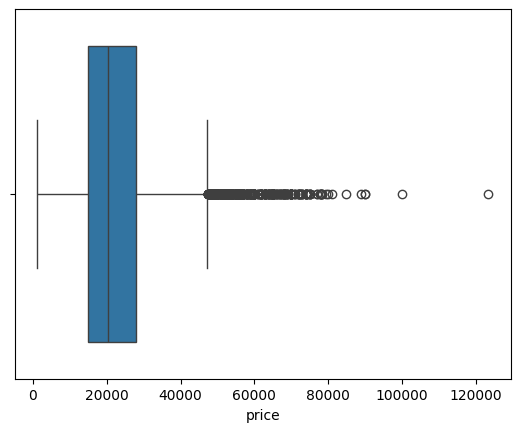

In [15]:
sns.boxplot(data['price'], orient='h')

In [16]:
df = data.loc[data['price'] <= 70000]

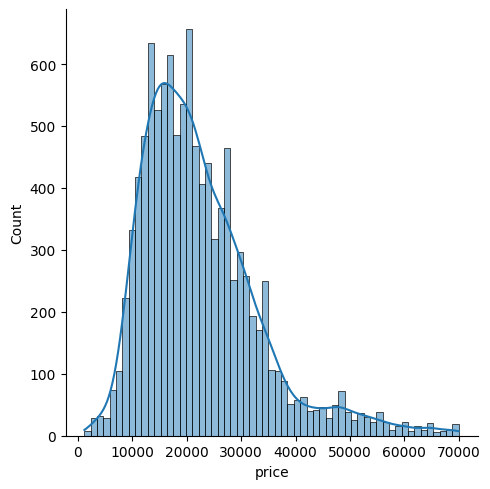

In [17]:
sns.displot(df['price'], kde=True)

In [18]:
df.shape

(10737, 9)

In [19]:
import plotly.express as px

In [20]:
px.scatter(data, x='mileage', y='price', color='transmission')

In [21]:
px.scatter(data, x='engineSize', y='price', color='fuelType')

#Machine Learning

In [22]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [23]:
# división de datos en variable dependiente y variables explicativas
X = df.drop('price', axis=1)
y = df['price']

columnas_categoricas = ['model', 'transmission', 'fuelType']
columnas_numericas = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

# Instanciación de transformador de columnas
preprocessing = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas),
                  ('num', StandardScaler(), columnas_numericas)])

# división de valores en datos de entrenmiento, prueba y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=7)

# Instanciación del modelo
model = RandomForestRegressor(random_state=7, )

# Creación de pipeline
pipeline = Pipeline([('transformacion', preprocessing), ('modelo', model)])


In [24]:
# Baseline con DummyRegressor
from sklearn.dummy import DummyRegressor

baseline = DummyRegressor(strategy='mean')

base_pipe = Pipeline([('transformacion', preprocessing), ('modelo', baseline)])

results = cross_validate(base_pipe, X_train, y_train, cv=5, scoring='r2')

print('Baseline r2 score', results['test_score'].mean().round(4))

Baseline r2 score -0.0003


In [25]:
# Evaluación del modelo con cross validate
results = cross_validate(pipeline, X_train, y_train, cv=5, scoring='r2', return_train_score=True)

print(f'RandomForestRegressor r2 train score: {results['train_score'].mean().round(4)*100}%')
print(f'RandomForestRegressor r2 test score: {results['test_score'].mean().round(4)*100}%')

RandomForestRegressor r2 train score: 99.3%
RandomForestRegressor r2 test score: 94.93%


In [26]:
# Evaluación de predicciones
pipeline.fit(X_train, y_train)
y_predict = pipeline.predict(X_test)

print(f"Test R2: {round(r2_score(y_test, y_predict)*100,4)}%")
print(f"Test RMSE: {(np.sqrt(mean_squared_error(y_test, y_predict))*100).round(4)}£")

Test R2: 96.2374%
Test RMSE: 216081.5131£


In [27]:
from sklearn.model_selection import GridSearchCV

##Buscando la mejor combinación de hiperparámetros

In [28]:
grid_params = {'modelo__n_estimators':[100,300,500],
               'modelo__criterion':['squared_error','friedman_mse'],
               'modelo__max_depth':[5,10,15],
               'modelo__min_samples_split':[2, 32, 64],
               'modelo__min_samples_leaf': [2, 32, 64]}

grid_search = GridSearchCV(estimator=pipeline, param_grid = grid_params, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformacion',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['model',
                                                                          'transmission',
                                                                          'fuelType']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['year',
                                                                          'mileage',
                                                                          'tax',
                                                                          'mpg',
                                                                          'engineSize'])])),
                                       ('modelo',
                                        RandomForestRegressor(random_state=7))]),
             param_grid={'modelo__criterion': ['squared_error', 'friedman_mse'],
                         'modelo__max_depth': [5, 10, 15],
                         'modelo__min_samples_leaf': [2, 32, 64],
                         'modelo__min_samples_split': [2, 32, 64],
                         'modelo__n_estimators': [100, 300, 500]},
             scoring='r2')

In [29]:
print(grid_search.best_params_)
print(round(grid_search.best_score_ * 100,4),'%')

{'modelo__criterion': 'squared_error', 'modelo__max_depth': 15, 'modelo__min_samples_leaf': 2, 'modelo__min_samples_split': 2, 'modelo__n_estimators': 500}
94.323 %


In [30]:
# Segunda Validación Cruzada
from sklearn.model_selection import KFold

best_model =  grid_search.best_estimator_
scores = cross_val_score(best_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=7), scoring='r2')
print(f'r2 score mean {round(scores.mean()*100,4)}%')

r2 score mean 94.4714%


In [31]:
# Validación
y_predict = best_model.predict(X_val)

print(f"Test R2: {round(r2_score(y_val, y_predict)*100,4)}%")
print(f"Test RMSE: {(np.sqrt(mean_squared_error(y_test, y_predict))*100).round(4)}£")

Test R2: 95.1679%
Test RMSE: 1535119.1717£


In [80]:
# Obtención de la importancia de las caracteristicas para el modelo
fitted_model = best_model.named_steps['modelo']

feature_importances = fitted_model.feature_importances_

fitted_preprocessor = best_model.named_steps['transformacion']

feature_names = fitted_preprocessor.get_feature_names_out()

feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

print("Feature Importances:")
display(feature_importances_df.head())

Feature Importances:


,Feature,Importance
32,num__year,0.477689
36,num__engineSize,0.260082
35,num__mpg,0.079001
33,num__mileage,0.054666
23,cat__model_ i8,0.016812


/tmp/ipython-input-2554217141.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



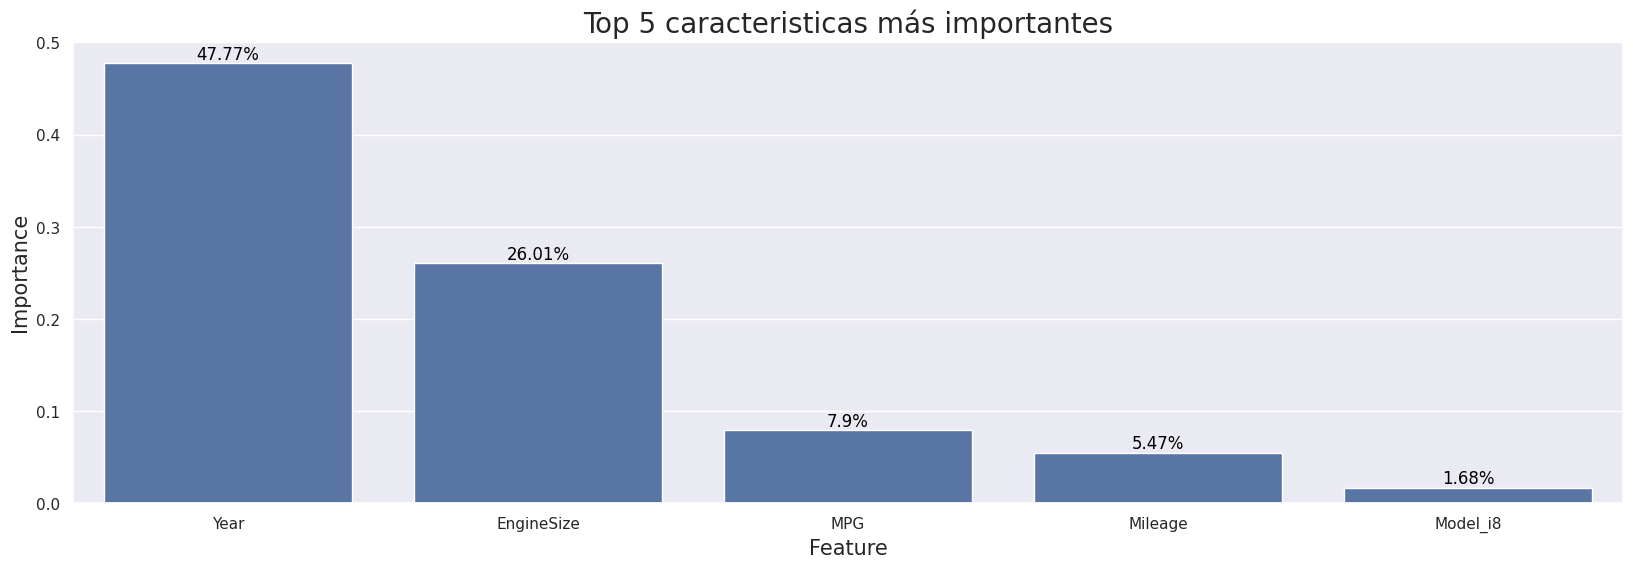

In [81]:
# Visualización de las caracteristicas mas importantes
fig, ax = plt.subplots(figsize=(20,6))
sns.set_theme(style="darkgrid")

ax = sns.barplot(x='Feature', y='Importance', data=feature_importances_df.head(5))
ax.set_title('Top 5 caracteristicas más importantes', fontsize=20)
ax.set_ylabel('Importance', fontsize=15)
ax.set_xlabel('Feature', fontsize=15)
ax.set_xticklabels(['Year', 'EngineSize', 'MPG', 'Mileage', 'Model_i8'])

for i,j in enumerate(feature_importances_df['Importance'].head(5)):
  ax.text(i,j+.01,f'{str(round(j*100,2))}%',color='black',fontsize=12,ha='center',va='center')

plt.show()